<div style="text-align:center; background-color:royalblue; color:wheat; font-size:25px; padding:20px;">
    <strong>NMI CLASSFICATION</strong>
</div>

In [89]:
#importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

<div style="text-align:center; background-color:black; color:cyan; font-size:25px; padding:20px;">
    <strong>01. Load Consumption file</strong>
</div>

In [2]:
#Reading a file
df = pd.read_excel("issue1.xlsx")

In [3]:
# Check first 5  header of the dataset
df.head()

,Item Code,finaldate,Description,mvt,Issue Qty,"Value (Cr,s)",Dept,Category
0,1711015901,07.04.2020,"CYL BRG OIL RG LP, DWG: A192.07.32E02",261,-4,1600000.0,MMD,Essential
1,2407912183,07.04.2020,"FILL PACK M67, PN:PT NO # 80-43073-11",201,-23,1400000.0,C&I,Essential
2,3290909113,07.04.2020,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",221,-1,1200000.0,CHM,Essential
3,7787931231,07.04.2020,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",921,-1,1200000.0,MBO,Desirable
4,7190990173,03.04.2020,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,975,-2,1000000.0,EMD,Desirable


In [4]:
#change / rename of column name
df = df.rename(columns = {'finaldate': 'date', 'Item Code' : 'Material', 'Value (Cr,s)' : 'Consvalue' })

In [5]:
#checking data type and info of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Material     122 non-null    int64  
 1   date         122 non-null    object 
 2   Description  122 non-null    object 
 3   mvt          122 non-null    int64  
 4   Issue Qty    122 non-null    int64  
 5   Consvalue    122 non-null    float64
 6   Dept         122 non-null    object 
 7   Category     122 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 7.8+ KB


In [6]:
#Deliminator (,) we have to separate (if above qty and amount type is object than run bellow code)
#df['Issue Qty'] =df['Issue Qty'].str.replace(",", "")
#df['Consvalue'] =df['Consvalue'].str.replace(",", "")

In [7]:
# Converting Issue qty and Consvalue into float type data
# df['Issue Qty'] =df['Issue Qty'].astype(float)
# df['Consvalue'] =df['Consvalue'].astype(float)

In [8]:
#Deliminator Date columns (. to - )conversion
df['date'] = df['date'].str.replace(".", "-")

In [9]:
#Date into date time format
df['date'] = pd.to_datetime(df['date'], format = '%d-%m-%Y')

In [10]:
#Function to convert date to Fiscal year / Academic year format
def convert_to_year(date):
    # Check if the month is greater than or equal to April (4)
    if date.month >= 4:
        return f"{date.year}-{str(date.year + 1)[2:]}"
    else:
        return f"{date.year - 1}-{str(date.year)[2:]}"

# Apply the updated function to the 'date' column
df['Fiscal_year'] = df['date'].apply(convert_to_year)


In [11]:
#Count of date in year (number of transaction)
df['Fiscal_year'].value_counts()

2021-22    41
2022-23    41
2020-21    40
Name: Fiscal_year, dtype: int64

In [12]:
# display the fiscal year bracket
df.head()

,Material,date,Description,mvt,Issue Qty,Consvalue,Dept,Category,Fiscal_year
0,1711015901,2020-04-07,"CYL BRG OIL RG LP, DWG: A192.07.32E02",261,-4,1600000.0,MMD,Essential,2020-21
1,2407912183,2020-04-07,"FILL PACK M67, PN:PT NO # 80-43073-11",201,-23,1400000.0,C&I,Essential,2020-21
2,3290909113,2020-04-07,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",221,-1,1200000.0,CHM,Essential,2020-21
3,7787931231,2020-04-07,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",921,-1,1200000.0,MBO,Desirable,2020-21
4,7190990173,2020-04-03,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,975,-2,1000000.0,EMD,Desirable,2020-21


In [13]:
#Filter the data based on the specified movement types
filtered_df = df[df['mvt'].isin([261,262,201,202,221,222,975,976,921,922])]

In [14]:
#grouped the data by material and year, and calculate the Total qty and movement count
grouped_df = filtered_df.groupby(['Material', 'Fiscal_year']).agg(total_qty=('Issue Qty', 'sum'),
    movement_count=('mvt', 'count')).reset_index()                   
                                                                                                                    

In [15]:
grouped_df.head()

,Material,Fiscal_year,total_qty,movement_count
0,1303100373,2020-21,-21,4
1,1303100373,2021-22,-21,4
2,1303100373,2022-23,-21,4
3,1711015901,2020-21,-12,3
4,1711015901,2021-22,-12,3


In [16]:
#classify the material based on Total qty and movement count
def classify_material(row):
    if row['total_qty']==0:
        return '0'
    elif row['movement_count']>4:
        return 'F'
    elif row['movement_count']<=4:
        return 'S'

In [17]:
#Apply function to data
grouped_df['Class'] = grouped_df.apply(classify_material, axis =1)

In [18]:
#Filter the data based on the specified Fiscal year
filtered_grouped_df = grouped_df[grouped_df['Fiscal_year'].isin(['2020-21','2021-22','2022-23'])]

In [19]:
filtered_grouped_df.head()

,Material,Fiscal_year,total_qty,movement_count,Class
0,1303100373,2020-21,-21,4,S
1,1303100373,2021-22,-21,4,S
2,1303100373,2022-23,-21,4,S
3,1711015901,2020-21,-12,3,S
4,1711015901,2021-22,-12,3,S


In [20]:
filtered_grouped_df.to_csv('Cons_total.csv', index = False)

In [21]:
filtered_grouped_df['Class'].value_counts()

S    22
F     8
Name: Class, dtype: int64

In [22]:
transformed_df = filtered_grouped_df.pivot_table(index = 'Material', columns = 'Fiscal_year', values = 'Class',
                                                aggfunc='first').reset_index()
                                            

In [23]:
#replacing null values with S
transformed_df.fillna('S', inplace=True)

In [24]:
transformed_df

Fiscal_year,Material,2020-21,2021-22,2022-23
0,1303100373,S,S,S
1,1711015901,S,S,S
2,2407912183,S,S,S
3,3005114843,S,S,F
4,3042011033,S,S,F
5,3290909113,S,S,S
6,5872992143,S,S,S
7,7190990173,F,F,F
8,7787931231,F,F,F
9,9696501423,S,S,S


In [25]:
#using the prerviously obtained transformed_df Dataframe
def determine_final_class(row):
    if row['2020-21']=='F' and row['2021-22']=='F' and row['2022-23']=='F':
        return 'F'
    else:
        return 'S'

In [26]:
#Apply the function
transformed_df['Final'] = transformed_df.apply(determine_final_class, axis = 1)

In [27]:
transformed_df

Fiscal_year,Material,2020-21,2021-22,2022-23,Final
0,1303100373,S,S,S,S
1,1711015901,S,S,S,S
2,2407912183,S,S,S,S
3,3005114843,S,S,F,S
4,3042011033,S,S,F,S
5,3290909113,S,S,S,S
6,5872992143,S,S,S,S
7,7190990173,F,F,F,F
8,7787931231,F,F,F,F
9,9696501423,S,S,S,S


In [28]:
transformed_df.to_csv("NMIClass1.csv", index = False)

<div style="text-align:center; background-color:black; color:cyan; font-size:25px; padding:20px;">
    <strong>02. Load Inventory file</strong>
</div>

In [29]:
#Reading a file
NMI = pd.read_csv('NMIClass1.csv')
inv = pd.read_excel("inventory.xlsx")

In [30]:
inv.head()

,Item Code,Description,UOM,InvQty,Value,Dept,Category
0,1711015911,"CYL BRG OIL RG LP, DWG: A192.07.32E02",EA,5,50000.0,MMD,Essential
1,2407912193,"FILL PACK M67, PN:PT NO # 80-43073-11",EA,1,100000.0,C&I,Essential
2,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,2,252520.0,CHM,Essential
3,7787931241,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",EA,5,2555500.0,MBO,Desirable
4,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,9,1000000.0,EMD,Desirable


In [31]:
inv = inv.rename(columns = {'Item Code': 'Material'})

In [32]:
#Merge class in inventory file 
result = inv.merge(NMI, on = 'Material', how = 'left', indicator = True)

In [33]:
result

,Material,Description,UOM,InvQty,Value,Dept,Category,2020-21,2021-22,2022-23,Final,_merge
0,1711015911,"CYL BRG OIL RG LP, DWG: A192.07.32E02",EA,5,50000.0,MMD,Essential,NaN,NaN,NaN,NaN,left_only
1,2407912193,"FILL PACK M67, PN:PT NO # 80-43073-11",EA,1,100000.0,C&I,Essential,NaN,NaN,NaN,NaN,left_only
2,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,2,252520.0,CHM,Essential,NaN,NaN,NaN,NaN,left_only
3,7787931241,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",EA,5,2555500.0,MBO,Desirable,NaN,NaN,NaN,NaN,left_only
4,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,9,1000000.0,EMD,Desirable,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...
160,3290909122,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,9,500000.0,MMD,Essential,NaN,NaN,NaN,NaN,left_only
161,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,10,1700000.0,MMD,Essential,NaN,NaN,NaN,NaN,left_only
162,3290909124,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,6,1800000.0,MMD,Essential,NaN,NaN,NaN,NaN,left_only
163,3290909125,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,9,1900000.0,MMD,Essential,NaN,NaN,NaN,NaN,left_only


In [34]:
#Fill up data with N with Null values or Nan
result.fillna('N', inplace=True)

In [35]:
result.to_csv("NMIclass2.csv" , index = False)

In [36]:
result['Final'].value_counts()

S    84
N    43
F    38
Name: Final, dtype: int64

<div style="text-align:center; background-color:black; color:pink; font-size:25px; padding:20px;">
    <strong>03. Load Receipt file</strong>
</div>

In [37]:
# reading a receipt file
df_receipt = pd.read_excel("Reciept.xlsx")

In [38]:
df_receipt.head(10)

,Material,recdate,Description,UOM,mvt,RecQty,Recvalue
0,3290909123,2022-10-01,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,101,2,252520
1,7787931241,2022-09-15,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",EA,101,5,2555500
2,7190990183,2023-02-15,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,101,9,1000000
3,7190990183,2023-01-01,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,101,5,1000000
4,7190990183,2023-04-04,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,101,4,1000000
5,7190990183,2021-04-04,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,101,5,1000000
6,5872992153,2021-04-04,"BELT DRIVE REDUCER WITH MOTOR,F/HD BSC36",Set,101,6,1000000
7,5872992153,2021-04-04,"BELT DRIVE REDUCER WITH MOTOR,F/HD BSC36",Set,102,-6,-1000000
8,9696501433,2021-04-04,"IR ILLUMINATORS F/CCTV, WAVELENGTH:850NM",Set,101,8,900000
9,1303100383,2021-04-04,"PUMP,SCREW,CAP:13.68M3/HR,4.8KW, 1400RPM",Set,101,9,900000


In [39]:
# converting date into date_time format
df_receipt['recdate'] = pd.to_datetime(df_receipt['recdate'])

In [40]:
#Filter and sum of 101-102
df_receipt = df_receipt[df_receipt['mvt'].isin([101,102])].groupby('Material')['RecQty'].sum().reset_index()

In [41]:
#merge the two datasets based on the material columns
df_merged = pd.merge(result,df_receipt, on = 'Material', how = 'left')

In [42]:
df_merged

,Material,Description,UOM,InvQty,Value,Dept,Category,2020-21,2021-22,2022-23,Final,_merge,RecQty
0,1711015911,"CYL BRG OIL RG LP, DWG: A192.07.32E02",EA,5,50000.0,MMD,Essential,N,N,N,N,left_only,5.0
1,2407912193,"FILL PACK M67, PN:PT NO # 80-43073-11",EA,1,100000.0,C&I,Essential,N,N,N,N,left_only,6.0
2,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,2,252520.0,CHM,Essential,N,N,N,N,left_only,10.0
3,7787931241,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",EA,5,2555500.0,MBO,Desirable,N,N,N,N,left_only,9.0
4,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,9,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,3290909122,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,9,500000.0,MMD,Essential,N,N,N,N,left_only,NaN
161,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,10,1700000.0,MMD,Essential,N,N,N,N,left_only,10.0
162,3290909124,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,6,1800000.0,MMD,Essential,N,N,N,N,left_only,NaN
163,3290909125,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,9,1900000.0,MMD,Essential,N,N,N,N,left_only,NaN


<div style="text-align:center; background-color:black; color:yellow; font-size:25px; padding:20px;">
    <strong>04. Load Opening file</strong>
</div>

In [43]:
ope = pd.read_excel("ope.xlsx")

In [44]:
ope = ope.rename(columns = {'Item Code':'Material'})

In [45]:
#group the data by Material and year,and calculate Total qty and movement count
Ope_grouped = ope.groupby('Material')['OpeQty'].sum().reset_index()

In [46]:
merged_data = pd.merge(df_merged, Ope_grouped, on = 'Material', how = 'left')

In [47]:
merged_data.head(10)

,Material,Description,UOM,InvQty,Value,Dept,Category,2020-21,2021-22,2022-23,Final,_merge,RecQty,OpeQty
0,1711015911,"CYL BRG OIL RG LP, DWG: A192.07.32E02",EA,5,50000.0,MMD,Essential,N,N,N,N,left_only,5.0,5.0
1,2407912193,"FILL PACK M67, PN:PT NO # 80-43073-11",EA,1,100000.0,C&I,Essential,N,N,N,N,left_only,6.0,1.0
2,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,2,252520.0,CHM,Essential,N,N,N,N,left_only,10.0,12.0
3,7787931241,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",EA,5,2555500.0,MBO,Desirable,N,N,N,N,left_only,9.0,5.0
4,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,9,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,NaN
5,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,5,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,NaN
6,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,4,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,NaN
7,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,5,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,NaN
8,5872992153,"BELT DRIVE REDUCER WITH MOTOR,F/HD BSC36",Set,6,1000000.0,F&S,Desirable,N,N,N,N,left_only,0.0,NaN
9,9696501433,"IR ILLUMINATORS F/CCTV, WAVELENGTH:850NM",Set,8,900000.0,CMS,Desirable,N,N,N,N,left_only,8.0,NaN


In [48]:
# Map consumption qty with inventory file 
cons = pd.read_csv('Cons_total.csv')

In [49]:
cons = cons.rename(columns = {'total_qty' : 'consqty'})

In [50]:
cons.head()

,Material,Fiscal_year,consqty,movement_count,Class
0,1303100373,2020-21,-21,4,S
1,1303100373,2021-22,-21,4,S
2,1303100373,2022-23,-21,4,S
3,1711015901,2020-21,-12,3,S
4,1711015901,2021-22,-12,3,S


In [51]:
#we have to group the total consqty material wise
cons = cons.groupby('Material')['consqty'].sum().reset_index()

In [53]:
#Merge the file with consumption data and original file of inventory
merged_data1 = pd.merge(merged_data, cons, on = 'Material', how = 'left')

In [54]:
merged_data1.head(10)

,Material,Description,UOM,InvQty,Value,Dept,Category,2020-21,2021-22,2022-23,Final,_merge,RecQty,OpeQty,consqty
0,1711015911,"CYL BRG OIL RG LP, DWG: A192.07.32E02",EA,5,50000.0,MMD,Essential,N,N,N,N,left_only,5.0,5.0,NaN
1,2407912193,"FILL PACK M67, PN:PT NO # 80-43073-11",EA,1,100000.0,C&I,Essential,N,N,N,N,left_only,6.0,1.0,NaN
2,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,2,252520.0,CHM,Essential,N,N,N,N,left_only,10.0,12.0,NaN
3,7787931241,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",EA,5,2555500.0,MBO,Desirable,N,N,N,N,left_only,9.0,5.0,NaN
4,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,9,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,NaN,NaN
5,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,5,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,NaN,NaN
6,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,4,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,NaN,NaN
7,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,5,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,NaN,NaN
8,5872992153,"BELT DRIVE REDUCER WITH MOTOR,F/HD BSC36",Set,6,1000000.0,F&S,Desirable,N,N,N,N,left_only,0.0,NaN,NaN
9,9696501433,"IR ILLUMINATORS F/CCTV, WAVELENGTH:850NM",Set,8,900000.0,CMS,Desirable,N,N,N,N,left_only,8.0,NaN,NaN


In [55]:
#fill Nan to zero values
merged_data1['RecQty'] = merged_data1['RecQty'].fillna(0)
merged_data1['OpeQty'] = merged_data1['OpeQty'].fillna(0)
merged_data1['consqty'] = merged_data1['consqty'].fillna(0)

In [56]:
merged_data1

,Material,Description,UOM,InvQty,Value,Dept,Category,2020-21,2021-22,2022-23,Final,_merge,RecQty,OpeQty,consqty
0,1711015911,"CYL BRG OIL RG LP, DWG: A192.07.32E02",EA,5,50000.0,MMD,Essential,N,N,N,N,left_only,5.0,5.0,0.0
1,2407912193,"FILL PACK M67, PN:PT NO # 80-43073-11",EA,1,100000.0,C&I,Essential,N,N,N,N,left_only,6.0,1.0,0.0
2,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,2,252520.0,CHM,Essential,N,N,N,N,left_only,10.0,12.0,0.0
3,7787931241,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",EA,5,2555500.0,MBO,Desirable,N,N,N,N,left_only,9.0,5.0,0.0
4,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,9,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,3290909122,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,9,500000.0,MMD,Essential,N,N,N,N,left_only,0.0,9.0,0.0
161,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,10,1700000.0,MMD,Essential,N,N,N,N,left_only,10.0,12.0,0.0
162,3290909124,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,6,1800000.0,MMD,Essential,N,N,N,N,left_only,0.0,6.0,0.0
163,3290909125,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,9,1900000.0,MMD,Essential,N,N,N,N,left_only,0.0,9.0,0.0


In [57]:
#filter rows where 'recqty' is present and both 'Opeqty' and 'consqty' are either zero or Nan
filtered_rows = merged_data1[(pd.notna(merged_data1['RecQty'])) & (merged_data1['OpeQty'].eq(0) |
                                                                  pd.isna(merged_data1['OpeQty'])) &
                            (merged_data1['consqty'].eq(0) | pd.isna(merged_data1['consqty']))]

In [58]:
filtered_rows.head()

,Material,Description,UOM,InvQty,Value,Dept,Category,2020-21,2021-22,2022-23,Final,_merge,RecQty,OpeQty,consqty
4,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,9,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,0.0,0.0
5,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,5,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,0.0,0.0
6,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,4,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,0.0,0.0
7,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,5,1000000.0,EMD,Desirable,N,N,N,N,left_only,32.0,0.0,0.0
8,5872992153,"BELT DRIVE REDUCER WITH MOTOR,F/HD BSC36",Set,6,1000000.0,F&S,Desirable,N,N,N,N,left_only,0.0,0.0,0.0


In [59]:
#Create the new column and redife all as S category after filtering the above code
filtered_rows['Final1'] = 'S'

In [60]:
#update the 'Final' column is the original Dataframe based on the filtered_rows
merged_data1['Final'] = filtered_rows['Final1'].combine_first(merged_data1['Final'])

In [61]:
merged_data1['Final'].value_counts()

S    103
F     38
N     24
Name: Final, dtype: int64

In [62]:
merged_data1.columns

Index(['Material', 'Description', 'UOM', 'InvQty', 'Value', 'Dept', 'Category',
       '2020-21', '2021-22', '2022-23', 'Final', '_merge', 'RecQty', 'OpeQty',
       'consqty'],
      dtype='object')

In [63]:
FinalNMI = merged_data1[['Material', 'Description', 'UOM', 'InvQty', 'Value', 'Final','Dept', 'Category']]

In [64]:
FinalNMI

,Material,Description,UOM,InvQty,Value,Final,Dept,Category
0,1711015911,"CYL BRG OIL RG LP, DWG: A192.07.32E02",EA,5,50000.0,N,MMD,Essential
1,2407912193,"FILL PACK M67, PN:PT NO # 80-43073-11",EA,1,100000.0,N,C&I,Essential
2,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,2,252520.0,N,CHM,Essential
3,7787931241,"DISK STACK,100DLC,2CH,6IN,. MM: 100 DLC-2CH",EA,5,2555500.0,N,MBO,Desirable
4,7190990183,PLCC CARD P1LA RF AMPLIFIER FOR ETL-41,EA,9,1000000.0,S,EMD,Desirable
...,...,...,...,...,...,...,...,...
160,3290909122,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,9,500000.0,N,MMD,Essential
161,3290909123,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,10,1700000.0,N,MMD,Essential
162,3290909124,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,6,1800000.0,N,MMD,Essential
163,3290909125,"OIL FILTERATION PLANT, 6KLPH, GEE. DEE VAC",EA,9,1900000.0,N,MMD,Essential


In [65]:
FinalNMI.to_csv('FinalClass.csv')

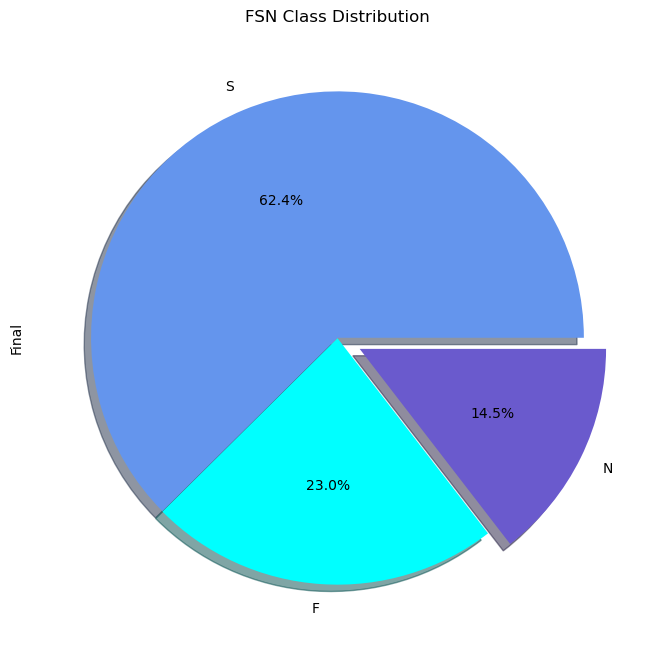

In [66]:
colors = ['cornflowerblue', 'cyan', 'slateblue']
explode = (0.001, 0.001,0.1)
plt.figure(figsize = (10,8))
FinalNMI['Final'].value_counts().plot.pie(autopct = '%1.1f%%', shadow = True, explode = explode, colors = colors)
plt.title("FSN Class Distribution")
plt.show()

In [67]:
VED_group = FinalNMI.groupby(['Final', 'Category'])['Value'].sum().reset_index()

In [68]:
VED_group['Total in Crs'] = VED_group['Value']/1e7
VED_group.T

,0,1,2,3,4
Final,F,N,N,S,S
Category,Desirable,Desirable,Essential,Desirable,Essential
Value,52600000.0,4155500.0,25282520.0,43600000.0,78200000.0
Total in Crs,5.26,0.41555,2.528252,4.36,7.82


<div style="text-align:center; background-color:black; color:orange; font-size:25px; padding:20px;">
    <strong>===========X===========X===========X=========X========</strong>
</div>

<div style="text-align:center; background-color:black; color:lightgreen; font-size:45px; padding:20px;">
    <strong>Visualization</strong>
</div>

In [90]:
#filter Datafrom for 'F' ,'S' and 'N' Categories
df_s = FinalNMI[FinalNMI['Final'] == 'S']
df_n = FinalNMI[FinalNMI['Final'] == 'N']
df_f = FinalNMI[FinalNMI['Final'] == 'F']


<div style="text-align:center; color:darkblue; font-size:20px; padding:20px;">
    <strong>Visualization Deparment wise </strong>
</div>

In [94]:
#Pie chart for 'S' Category
fig_s = px.pie(df_s, names = 'Dept', title = 'Fsn Distribution-Category S', hole = .4,
              color_discrete_sequence = ['skyblue'])
fig_s.update_layout(showlegend = True, legend = dict(title='Department'))
fig_s.show()


In [96]:
#Pie chart for 'N' Category
fig_n = px.pie(df_n, names = 'Dept', title = 'Fsn Distribution-Category N', hole = .4,
              color_discrete_sequence = ['lightcoral'])
fig_n.update_layout(showlegend = True, legend = dict(title='Department'))
fig_n.show()


In [98]:
#Pie chart for 'F' Category
fig_f = px.pie(df_f, names = 'Dept', title = 'Fsn Distribution-Category F', hole = .4,
              color_discrete_sequence = ['darkgreen'])
fig_f.update_layout(showlegend = True, legend = dict(title='Department'))
fig_f.show()
